Here's a toy profile to illustrate the infinite recursion that needs to happen for meek transfers when >1 winner has been elected.

In this case, candidates 1 and 2 are both elected in the first round (or would be elected in the first two rounds, if not running a simultaneous election).

Their initial tallies are 120, so their initial keep factor is k = 100/120 = 5/6.

But there are many ballots that transfer from candidates 1 to 2 and vice versa, so after applying that initial keep factor their tallies would still be 112.5. Traditional meek rules say that we should repeat the transfer process until those tallies become 100.000001. Let's see what that looks like!

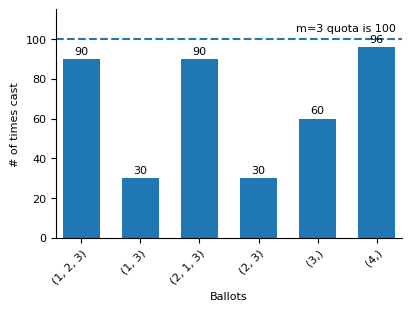

In [28]:
import matplotlib.pyplot as plt

FIGSIZE   = (4, 3)  
BAR_WIDTH = 0.62
FONTSIZE  = 8
# -----------------------------------

# Data
x_axis_labels = ["(1, 2, 3)", "(1, 3)", "(2, 1, 3)", "(2, 3)", "(3,)", "(4,)"]
y_axis_heights = [90, 30, 90, 30, 60, 96]

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

# X positions
x = list(range(len(x_axis_labels)))

# Draw bars
bars = ax.bar(x, y_axis_heights, width=BAR_WIDTH)

# Value labels
ax.bar_label(bars, fmt="%d", padding=2, fontsize=FONTSIZE)

# Highlight the "(4,5)" bar in red (if present)
highlight_label = "(4,5)"
if highlight_label in x_axis_labels:
    idx = x_axis_labels.index(highlight_label)
    bars[idx].set_facecolor("red")

# X-axis labels rotated 45° to prevent overlap
ax.set_xticks(x)
ax.set_xticklabels(x_axis_labels, rotation=45, ha="right", rotation_mode="anchor", fontsize=FONTSIZE)

# Y-axis label size
ax.tick_params(axis="y", labelsize=FONTSIZE)

# Headroom for quota labels
top = max(max(y_axis_heights), 100) * 1.15
ax.set_ylim(0, top)

# Optional: tighten side margins a bit
ax.margins(x=0.02)

# Dashed horizontal line at 100
ax.axhline(100, linestyle="--")

# Quota labels (right-aligned)
ax.annotate(
    "m=3 quota is 100",
    xy=(1.0, 100), xycoords=("axes fraction", "data"),
    xytext=(-4, 4), textcoords="offset points",
    ha="right", va="bottom", fontsize=FONTSIZE
)

# Cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Ballots", fontsize=FONTSIZE)
ax.set_ylabel("# of times cast", fontsize=FONTSIZE)

# With constrained_layout=True, no need for fig.tight_layout()
plt.show()


In [22]:
import numpy as np
import math

# operationalize this profile
# WLOG votes only transfer *from* candidates 1 and 2, and never list *both* 3 and 4
# TODO: general meek rule that takes for input a votekit PrefProfile

t123 = 90
t13 = 30
t12 = 0
t1 = 0
t213 = 90
t23 = 30
t21 = 0
t2 = 0
t3 = 60
t4 = 96
q = 100
# initialize record arrays for each of these values
t123_rec = [int(t123)]
t13_rec = [int(t13)]
t12_rec = [int(t12)]
t1_rec = [int(t1)]
t213_rec = [int(t213)]
t23_rec = [int(t23)]
t21_rec = [int(t21)]
t2_rec = [int(t2)]
t3_rec = [int(t3)]
t4_rec = [int(t4)]
q_rec = [int(q)]

def single_iteration(t123, t13, t12, t1, t213, t23, t21, t2, t3, t4, quota):
    cand1_total = t123 + t13 + t12 + t1
    cand2_total = t213 + t23 + t21 + t2
    assert cand1_total > quota, f"Candidate 1 has t123 = {t123}, t13 = {t13}, t12 = {t12}, t1 = {t1}, total = {cand1_total} not exceeding quota {quota}"
    assert cand2_total > quota, f"Candidate 2 has t213 = {t213}, t23 = {t23}, t21 = {t21}, t2 = {t2}, total = {cand2_total} not exceeding quota {quota}"
    k1 = quota / cand1_total
    k2 = quota / cand2_total
    new_t1 = k1 * (t1 + (1-k2)* t21)
    new_t2 = k2 * (t2 + (1-k1)* t12)
    new_t12 = k1* t12
    new_t21 = k2* t21
    new_t13 = k1 * (t13 + (1-k2)* t213)
    new_t23 = k2 * (t23 + (1-k1)* t123)
    new_t123 = k1 * t123
    new_t213 = k2 * t213
    new_t3 = t3 + (1 - k1) * (t13 + (1-k2)*t213) + (1 - k2) * (t23 + (1-k1)*t123)
    new_t4 = t4
    new_total = (new_t123 + new_t13 + new_t12 + new_t1 +
                 new_t213 + new_t23 + new_t21 + new_t2 +
                 new_t3 + new_t4)
    new_quota = math.floor(new_total / 4) + 1
    return (new_t123, new_t13, new_t12, new_t1,
            new_t213, new_t23, new_t21, new_t2,
            new_t3, new_t4, new_quota)

def plot_iterand1(t123, t13, t12, t1, t213, t23, t21, t2, t3, t4, quota):
    import matplotlib.pyplot as plt

    # --- Controls for compact layout ---
    FIGSIZE   = (4, 3)   # (width, height) in inches
    BAR_WIDTH = 0.62
    FONTSIZE  = 8
    # -----------------------------------

    # Data
    x_axis_labels = ["(1, 2, 3)", "(1, 3)", "(2, 1, 3)", "(2, 3)", "(3,)", "(4,)"]
    y_axis_heights = [t123, t13, t213, t23, t3, t4]

    fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

    # X positions
    x = list(range(len(x_axis_labels)))

    # Draw bars
    bars = ax.bar(x, y_axis_heights, width=BAR_WIDTH)

    # Value labels
    ax.bar_label(bars, fmt="%d", padding=2, fontsize=FONTSIZE)

    # Highlight the "(4,5)" bar in red (if present)
    highlight_label = "(4,5)"
    if highlight_label in x_axis_labels:
        idx = x_axis_labels.index(highlight_label)
        bars[idx].set_facecolor("red")

    # X-axis labels rotated 45° to prevent overlap
    ax.set_xticks(x)
    ax.set_xticklabels(x_axis_labels, rotation=45, ha="right", rotation_mode="anchor", fontsize=FONTSIZE)

    # Y-axis label size
    ax.tick_params(axis="y", labelsize=FONTSIZE)

    # Headroom for quota labels
    top = max(max(y_axis_heights), 100) * 1.15
    ax.set_ylim(0, top)

    # Optional: tighten side margins a bit
    ax.margins(x=0.02)

    # Dashed horizontal line at quota
    ax.axhline(quota, linestyle="--")

    # Quota labels (right-aligned)
    ax.annotate(
        f"m=3 quota is {quota}",
        xy=(1.0, quota), xycoords=("axes fraction", "data"),
        xytext=(-4, 4), textcoords="offset points",
        ha="right", va="bottom", fontsize=FONTSIZE
    )

    # Cosmetics
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Ballots", fontsize=FONTSIZE)
    ax.set_ylabel("# of times cast", fontsize=FONTSIZE)

    # With constrained_layout=True, no need for fig.tight_layout()
    plt.show()

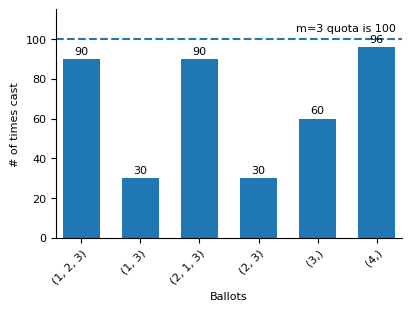

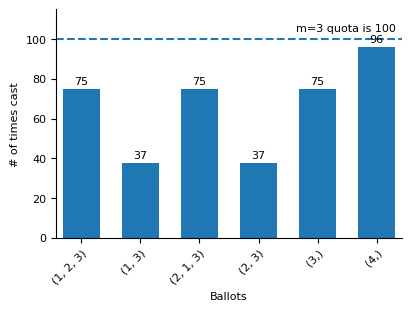

In [8]:
plot_iterand1(
    t123, t13, t12, t1,
    t213, t23, t21, t2,
    t3, t4, q)

t123, t13, t12, t1, t213, t23, t21, t2, t3, t4, q = single_iteration(
    t123, t13, t12, t1,
    t213, t23, t21, t2,
    t3, t4, q)

plot_iterand1(
    t123, t13, t12, t1,
    t213, t23, t21, t2,
    t3, t4, q)  

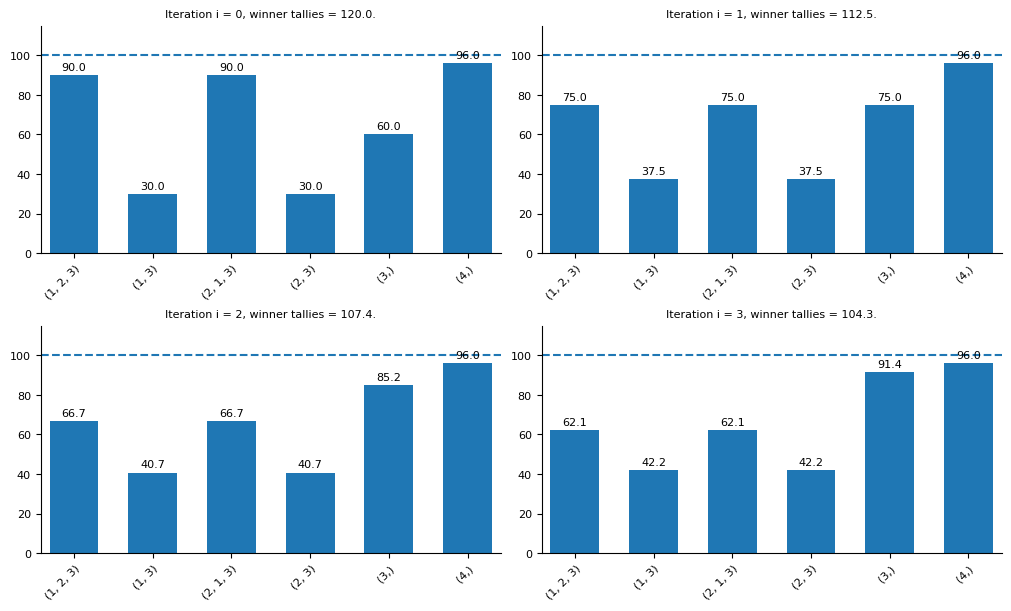

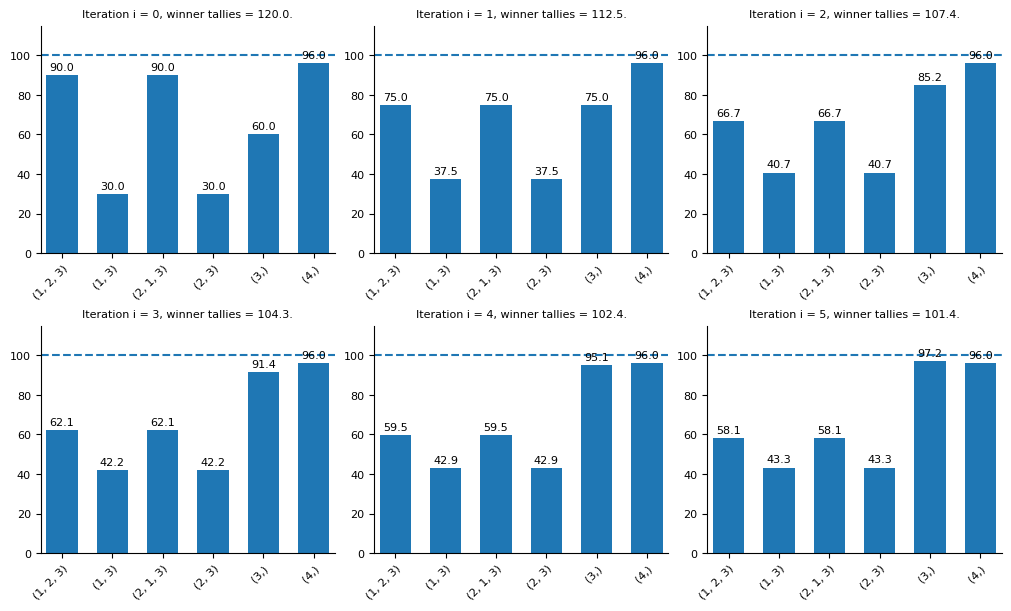

In [19]:
ITERATIONS = 6

for iteration_index in range(1, ITERATIONS + 1):
    (
        t123, t13, t12, t1,
        t213, t23, t21, t2,
        t3, t4, q,
    ) = single_iteration(
        t123, t13, t12, t1,
        t213, t23, t21, t2,
        t3, t4, q,
    )

    t123_rec.append(t123)
    t13_rec.append(t13)
    t12_rec.append(t12)
    t1_rec.append(t1)
    t213_rec.append(t213)
    t23_rec.append(t23)
    t21_rec.append(t21)
    t2_rec.append(t2)
    t3_rec.append(t3)
    t4_rec.append(t4)
    q_rec.append(q)


def _plot_iterands(iteration_count, rows, cols, title_fmt):
    import matplotlib.pyplot as plt

    FIGSIZE = (10, 6)
    BAR_WIDTH = 0.62
    FONTSIZE = 8
    labels = ["(1, 2, 3)", "(1, 3)", "(2, 1, 3)", "(2, 3)", "(3,)", "(4,)"]

    fig, axes = plt.subplots(rows, cols, figsize=FIGSIZE, constrained_layout=True)
    axes = axes.flatten()
    max_panels = len(axes)

    iteration_count = min(iteration_count, len(t123_rec), max_panels)
    if iteration_count <= 0:
        raise ValueError("No iterations recorded to plot.")

    overall_top = max(
        max(
            t123_rec[i],
            t13_rec[i],
            t213_rec[i],
            t23_rec[i],
            t3_rec[i],
            t4_rec[i],
        )
        for i in range(iteration_count)
    )
    overall_top = max(overall_top, max(q_rec[:iteration_count]), 100) * 1.15

    for axis_index, iteration in enumerate(range(iteration_count)):
        ax = axes[axis_index]
        heights = [
            t123_rec[iteration],
            t13_rec[iteration],
            t213_rec[iteration],
            t23_rec[iteration],
            t3_rec[iteration],
            t4_rec[iteration],
        ]
        bars = ax.bar(range(len(labels)), heights, width=BAR_WIDTH)
        ax.bar_label(bars, fmt='%.1f', padding=2, fontsize=FONTSIZE)
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor', fontsize=FONTSIZE)
        ax.tick_params(axis='y', labelsize=FONTSIZE)
        ax.set_ylim(0, overall_top)
        ax.axhline(q_rec[iteration], linestyle='--')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        winner_tallies = t123_rec[iteration] + t13_rec[iteration]
        ax.set_title(title_fmt.format(iteration=iteration, winner=winner_tallies), fontsize=FONTSIZE)
        ax.margins(x=0.02)

    for ax in axes[iteration_count:]:
        ax.remove()

    plt.show()


def plot_iterand2(iteration_count=4):
    _plot_iterands(
        iteration_count=iteration_count,
        rows=2,
        cols=2,
        title_fmt="Iteration i = {iteration}, winner tallies = {winner:.1f}.",
    )


def plot_iterand3(iteration_count=6):
    _plot_iterands(
        iteration_count=iteration_count,
        rows=2,
        cols=3,
        title_fmt="Iteration i = {iteration}, winner tallies = {winner:.1f}.",
    )


plot_iterand2()
plot_iterand3()


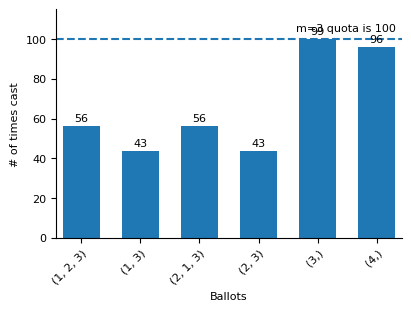

t123 = 56.290205
t13 = 43.709796
t3 = 99.999998
iterations run = 30


In [23]:
EPSILON = 1e-6
MAX_ITERATIONS = 1000
iterations_run = 0

while (t123 + t13) - 100 >= EPSILON:
    (
        t123, t13, t12, t1,
        t213, t23, t21, t2,
        t3, t4, q,
    ) = single_iteration(
        t123, t13, t12, t1,
        t213, t23, t21, t2,
        t3, t4, q,
    )

    t123_rec.append(t123)
    t13_rec.append(t13)
    t12_rec.append(t12)
    t1_rec.append(t1)
    t213_rec.append(t213)
    t23_rec.append(t23)
    t21_rec.append(t21)
    t2_rec.append(t2)
    t3_rec.append(t3)
    t4_rec.append(t4)
    q_rec.append(q)

    iterations_run += 1
    if iterations_run >= MAX_ITERATIONS:
        raise RuntimeError("Reached maximum iterations without convergence.")

plot_iterand1(
    t123, t13, t12, t1,
    t213, t23, t21, t2,
    t3, t4, q,
)

print(f"t123 = {t123:.6f}")
print(f"t13 = {t13:.6f}")
print(f"t3 = {t3:.6f}")
print(f"iterations run = {iterations_run}")

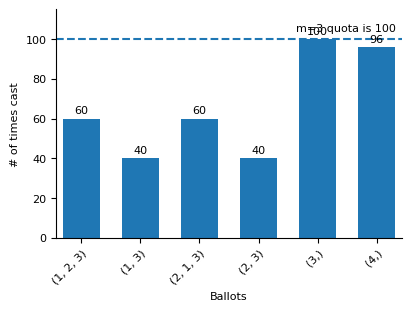

In [ ]:
# alternative steady state
plot_iterand1(
    60, 40, 0, 0,
    60, 40, 0, 0,
    100, 96, 100,
)

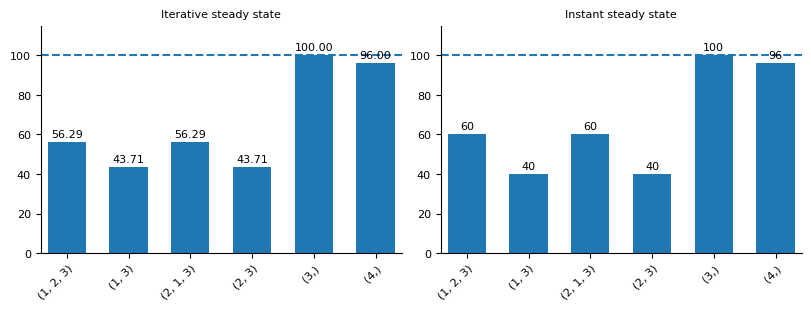

In [27]:
import matplotlib.pyplot as plt

labels = ["(1, 2, 3)", "(1, 3)", "(2, 1, 3)", "(2, 3)", "(3,)", "(4,)"]
iterative_heights = [t123, t13, t213, t23, t3, t4]
alternative_heights = [60, 40, 60, 40, 100, 96]

fig, axes = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)

# Iterative steady state
iter_ax = axes[0]
iter_bars = iter_ax.bar(range(len(labels)), iterative_heights, width=0.62)
iter_ax.bar_label(iter_bars, fmt='%.2f', padding=2, fontsize=8)
iter_ax.set_xticks(range(len(labels)))
iter_ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
iter_ax.tick_params(axis='y', labelsize=8)
iter_ax.set_ylim(0, max(max(iterative_heights), q) * 1.15)
iter_ax.axhline(q, linestyle='--')
iter_ax.spines['top'].set_visible(False)
iter_ax.spines['right'].set_visible(False)
iter_ax.set_title('Iterative steady state', fontsize=8)
iter_ax.margins(x=0.02)

# Alternative steady state
alt_ax = axes[1]
alt_bars = alt_ax.bar(range(len(labels)), alternative_heights, width=0.62)
alt_ax.bar_label(alt_bars, fmt='%d', padding=2, fontsize=8)
alt_ax.set_xticks(range(len(labels)))
alt_ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
alt_ax.tick_params(axis='y', labelsize=8)
alt_ax.set_ylim(0, max(max(alternative_heights), 100) * 1.15)
alt_ax.axhline(100, linestyle='--')
alt_ax.spines['top'].set_visible(False)
alt_ax.spines['right'].set_visible(False)
alt_ax.set_title('Instant steady state', fontsize=8)
alt_ax.margins(x=0.02)

plt.show()


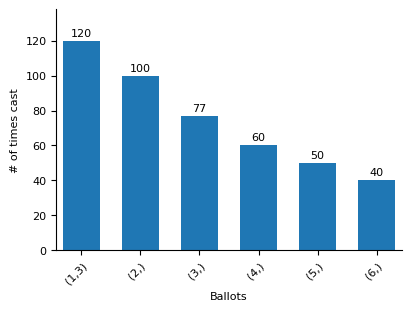

In [30]:


FIGSIZE   = (4, 3)  
BAR_WIDTH = 0.62
FONTSIZE  = 8
# -----------------------------------

# Data
x_axis_labels = ["(1,3)", "(2,)", "(3,)", "(4,)", "(5,)", "(6,)"]
y_axis_heights = [120, 100, 77, 60, 50, 40]

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

# X positions
x = list(range(len(x_axis_labels)))

# Draw bars
bars = ax.bar(x, y_axis_heights, width=BAR_WIDTH)

# Value labels
ax.bar_label(bars, fmt="%d", padding=2, fontsize=FONTSIZE)

# Highlight the "(4,5)" bar in red (if present)
highlight_label = "(4,5)"
if highlight_label in x_axis_labels:
    idx = x_axis_labels.index(highlight_label)
    bars[idx].set_facecolor("red")

# X-axis labels rotated 45° to prevent overlap
ax.set_xticks(x)
ax.set_xticklabels(x_axis_labels, rotation=45, ha="right", rotation_mode="anchor", fontsize=FONTSIZE)

# Y-axis label size
ax.tick_params(axis="y", labelsize=FONTSIZE)

# Headroom for quota labels
top = max(max(y_axis_heights), 100) * 1.15
ax.set_ylim(0, top)

# Optional: tighten side margins a bit
ax.margins(x=0.02)

# Dashed horizontal line at 100
#ax.axhline(100, linestyle="--")

# Quota labels (right-aligned)
#ax.annotate(
#    "m=3 quota is 100",
#    xy=(1.0, 100), xycoords=("axes fraction", "data"),
#    xytext=(-4, 4), textcoords="offset points",
#    ha="right", va="bottom", fontsize=FONTSIZE
#)

# Cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Ballots", fontsize=FONTSIZE)
ax.set_ylabel("# of times cast", fontsize=FONTSIZE)

# With constrained_layout=True, no need for fig.tight_layout()
plt.show()


In [ ]:
import numpy as np
import math

# operationalize this profile
# WLOG votes only transfer *from* candidates 1 and 2, and never list *both* 3 and 4
# TODO: general meek rule that takes for input a votekit PrefProfile

t12 = 60
t1 = 90
t2 = 65
t3 = 90
q = 100
# initialize record arrays for each of these values
t123_rec = [int(t123)]
t13_rec = [int(t13)]
t12_rec = [int(t12)]
t1_rec = [int(t1)]
t213_rec = [int(t213)]
t23_rec = [int(t23)]
t21_rec = [int(t21)]
t2_rec = [int(t2)]
t3_rec = [int(t3)]
t4_rec = [int(t4)]
q_rec = [int(q)]

def single_iteration2(t12, t1, t2, t3, quota):
    cand1_total = t12 + t1
    cand2_total = t213 + t23 + t21 + t2
    assert cand1_total > quota, f"Candidate 1 has t123 = {t123}, t13 = {t13}, t12 = {t12}, t1 = {t1}, total = {cand1_total} not exceeding quota {quota}"
    assert cand2_total > quota, f"Candidate 2 has t213 = {t213}, t23 = {t23}, t21 = {t21}, t2 = {t2}, total = {cand2_total} not exceeding quota {quota}"
    k1 = quota / cand1_total
    k2 = quota / cand2_total
    new_t1 = k1 * (t1 + (1-k2)* t21)
    new_t2 = k2 * (t2 + (1-k1)* t12)
    new_t12 = k1* t12
    new_t21 = k2* t21
    new_t13 = k1 * (t13 + (1-k2)* t213)
    new_t23 = k2 * (t23 + (1-k1)* t123)
    new_t123 = k1 * t123
    new_t213 = k2 * t213
    new_t3 = t3 + (1 - k1) * (t13 + (1-k2)*t213) + (1 - k2) * (t23 + (1-k1)*t123)
    new_t4 = t4
    new_total = (new_t123 + new_t13 + new_t12 + new_t1 +
                 new_t213 + new_t23 + new_t21 + new_t2 +
                 new_t3 + new_t4)
    new_quota = math.floor(new_total / 4) + 1
    return (new_t123, new_t13, new_t12, new_t1,
            new_t213, new_t23, new_t21, new_t2,
            new_t3, new_t4, new_quota)

def plot_iterand1(t123, t13, t12, t1, t213, t23, t21, t2, t3, t4, quota):
    import matplotlib.pyplot as plt

    # --- Controls for compact layout ---
    FIGSIZE   = (4, 3)   # (width, height) in inches
    BAR_WIDTH = 0.62
    FONTSIZE  = 8
    # -----------------------------------

    # Data
    x_axis_labels = ["(1, 2, 3)", "(1, 3)", "(2, 1, 3)", "(2, 3)", "(3,)", "(4,)"]
    y_axis_heights = [t123, t13, t213, t23, t3, t4]

    fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

    # X positions
    x = list(range(len(x_axis_labels)))

    # Draw bars
    bars = ax.bar(x, y_axis_heights, width=BAR_WIDTH)

    # Value labels
    ax.bar_label(bars, fmt="%d", padding=2, fontsize=FONTSIZE)

    # Highlight the "(4,5)" bar in red (if present)
    highlight_label = "(4,5)"
    if highlight_label in x_axis_labels:
        idx = x_axis_labels.index(highlight_label)
        bars[idx].set_facecolor("red")

    # X-axis labels rotated 45° to prevent overlap
    ax.set_xticks(x)
    ax.set_xticklabels(x_axis_labels, rotation=45, ha="right", rotation_mode="anchor", fontsize=FONTSIZE)

    # Y-axis label size
    ax.tick_params(axis="y", labelsize=FONTSIZE)

    # Headroom for quota labels
    top = max(max(y_axis_heights), 100) * 1.15
    ax.set_ylim(0, top)

    # Optional: tighten side margins a bit
    ax.margins(x=0.02)

    # Dashed horizontal line at quota
    ax.axhline(quota, linestyle="--")

    # Quota labels (right-aligned)
    ax.annotate(
        f"m=3 quota is {quota}",
        xy=(1.0, quota), xycoords=("axes fraction", "data"),
        xytext=(-4, 4), textcoords="offset points",
        ha="right", va="bottom", fontsize=FONTSIZE
    )

    # Cosmetics
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Ballots", fontsize=FONTSIZE)
    ax.set_ylabel("# of times cast", fontsize=FONTSIZE)

    # With constrained_layout=True, no need for fig.tight_layout()
    plt.show()